In [20]:
import pandas as pd
import data_cleanup as dc
import domain_comparison as doc
import data_exploration as de
import seaborn as sns
import matplotlib.pyplot as plt
import severity_score as ses
import numpy as np
from scipy.stats import gaussian_kde

### In this document the same operations as in Domain_slicing are done. In this case amino acids based on random codon generation are removed before.

Starting out with Generation of the new DF with only the single mutations

In [21]:
#fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv'
#fpath = '../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv'
gia_null_eto =dc.norm(pd.read_csv(fpath))
dc.aufteilung_mut_pos(gia_null_eto)

dna_sequence = "ATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGCACAGAGGAAGAGAATCTCCGCAAGAAAGGGGAGCCTCACCACGAGCTGCCCCCAGGGAGCACTAAGCGAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCACTGGATGGAGAATATTTCACCCTTCAGATCCGTGGGCGTGAGCGCTTCGAGATGTTCCGAGAGCTGAATGAGGCCTTGGAACTCAAGGATGCCCAGGCTGGGAAGGAGCCAGGGGGGAGCAGGGCTCACTCCAGCCACCTGAAGTCCAAAAAGGGTCAGTCTACCTCCCGCCATAAAAAACTCATGTTCAAGACAGAAGGGCCTGACTCAGAC"
rna_sequence = dna_sequence.replace("T", "U")

p53_codons = [rna_sequence[i:i+3] for i in range(0, len(rna_sequence), 3)]

p53_codons[71] = "CGC"

mutated_p53 = ses.generate_codon_variations_rdm(p53_codons)

translated_p53 = ses.translate_codons_df(mutated_p53)

cleaned_p53 = ses.clean_variation_matrix(translated_p53)

df = gia_null_eto[gia_null_eto.apply(lambda row: (cleaned_p53.loc[row['position_mut']-1, 'Original'] == row['AS_old']) and (row['AS_new'] in cleaned_p53.loc[row['position_mut']-1, ['Variation 1', 'Variation 2', 'Variation 3', 'Variation 4', 'Variation 5', 'Variation 6', 'Variation 7', 'Variation 8', 'Variation 9']].values), axis=1)]

mutated_p53

,Original,Variation 1,Variation 2,Variation 3,Variation 4,Variation 5,Variation 6,Variation 7,Variation 8,Variation 9
0,AUG,TTA,GCC,GCA,GTA,TGG,TAC,TGT,GGG,ACG
1,GAG,AAC,GTA,ATC,TTC,GGA,GTT,GAG,TGT,ACC
2,GAG,TGT,AGT,CGG,TCT,TGC,ACA,CTC,CGA,GAT
3,CCG,GCG,CCA,AAT,TGT,TCT,ATT,CTC,TAA,ACC
4,CAG,CCA,GGG,GAT,TAA,AGG,CTA,TTT,ACT,GGT
...,...,...,...,...,...,...,...,...,...,...
388,GGG,ACT,ATG,CTC,TAT,TGT,CGT,GGC,AAC,GGT
389,CCU,TAG,CAA,AGG,GTT,AGC,CGA,TTT,GTC,TGC
390,GAC,GGA,ATT,CTC,TGA,GAC,TAG,AAC,AAA,CAC
391,UCA,TGT,CCA,TAC,GAG,GCA,CTT,CGG,CGC,GAA


In [22]:
# Saving the different domains for better accessibility

#Transactivation Domain 1
t1_start = 1
t1_end = 43

#Transactivation Domain 2
t2_start = 44
t2_end = 63

#Proline-rich Region
pr_start = 64
pr_end = 92

#DNA Binding Domain
dna_start = 102
dna_end = 292

#Tetramerization Domain
tetra_start = 320
tetra_end = 355

#Regulatory Domain
reg_start = 356
reg_end = 393



t1_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t1_start, end= t1_end)))
t1_list = doc.slice_domain(df, start= t1_start, end= t1_end)

t2_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t2_start, end= t2_end)))
t2_list = doc.slice_domain(df, start= t2_start, end= t2_end)

pr_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= pr_start, end= pr_end)))
pr_list = doc.slice_domain(df, start= pr_start, end= pr_end)

dna_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= dna_start, end= dna_end)))
dna_list = doc.slice_domain(df, start= dna_start, end= dna_end)

tetra_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= tetra_start, end= tetra_end)))
tetra_list = doc.slice_domain(df, start= tetra_start, end= tetra_end)

reg_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= reg_start, end= reg_end)))
reg_list = doc.slice_domain(df, start= reg_start, end= reg_end)


## Mean values

In [23]:
t1_mean = t1_domain.mean().rename('mean')
t1_mean.to_csv('./data/t1_gnn_rdm')
t2_mean = t2_domain.mean().rename('mean')
t2_mean.to_csv('./data/t2_gnn_rdm')
pr_mean = pr_domain.mean().rename('mean')
pr_mean.to_csv('./data/pr_gnn_rdm')
dna_mean = dna_domain.mean().rename('mean')
dna_mean.to_csv('./data/dna_gnn_rdm')
tetra_mean = tetra_domain.mean().rename('mean')
tetra_mean.to_csv('./data/tetra_gnn_rdm')
reg_mean = reg_domain.mean().rename('mean')
reg_mean.to_csv('./data/reg_gnn_rdm')

## Distribution and Heatmaps
### Transactivation Domain 1

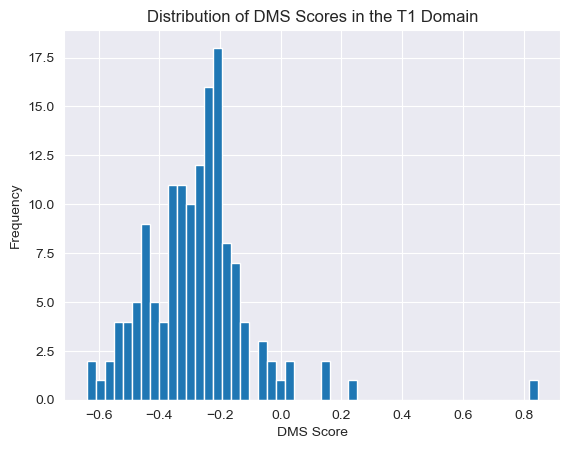

-0.2764853402936189
-0.27181437478700454


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

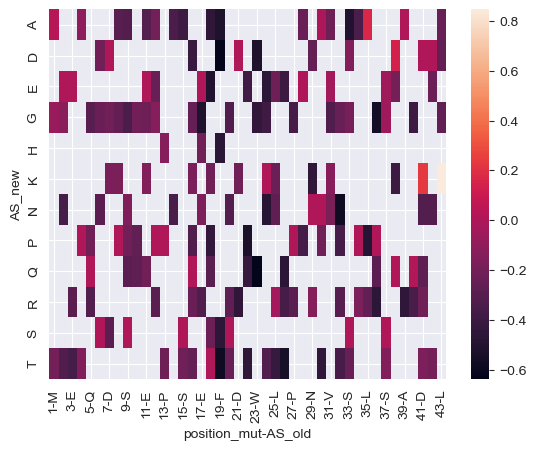

In [24]:

dms_scores_t1 = t1_list['DMS_score']

plt.hist(dms_scores_t1, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T1 Domain')
plt.show()

print(dms_scores_t1.mean())
print(dms_scores_t1.median())
sns.heatmap(t1_domain)

### Transactivation Domain 2

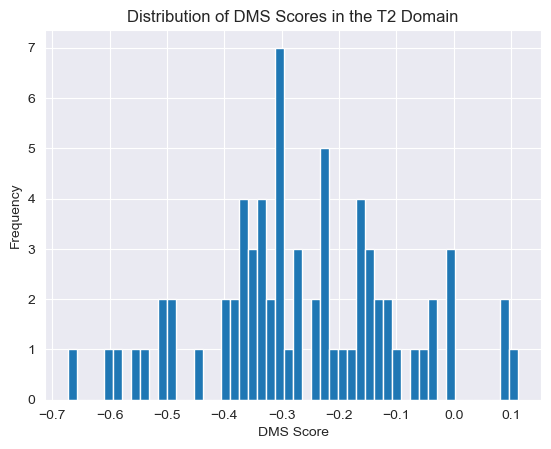

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

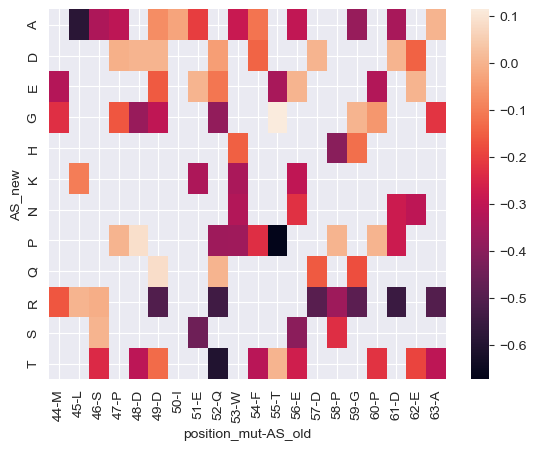

In [25]:

dms_scores_t2 = t2_list['DMS_score']

plt.hist(dms_scores_t2, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T2 Domain')
plt.show()

sns.heatmap(t2_domain)

### Proline-rich Region

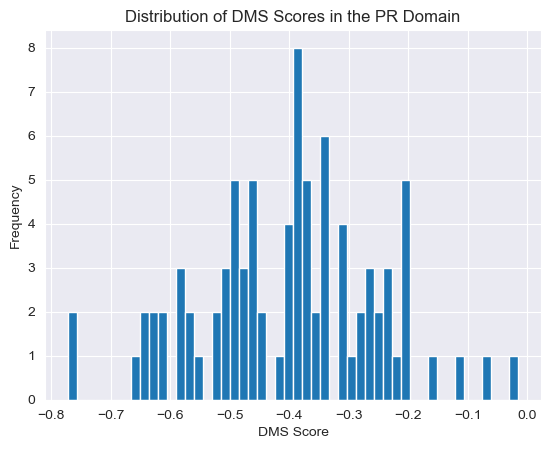

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

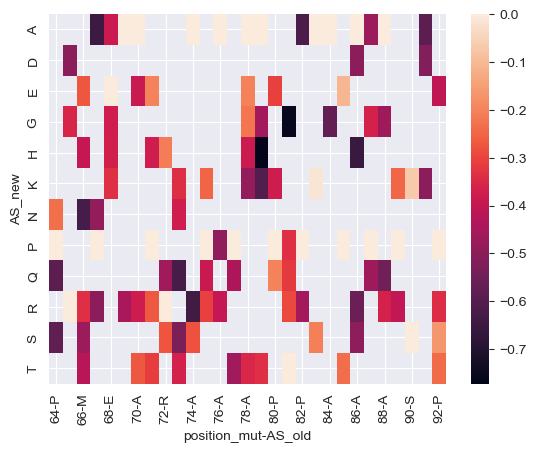

In [26]:
dms_scores_pr = pr_list['DMS_score']

plt.hist(dms_scores_pr, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the PR Domain')
plt.show()

sns.heatmap(pr_domain)

### DNA Binding Domain

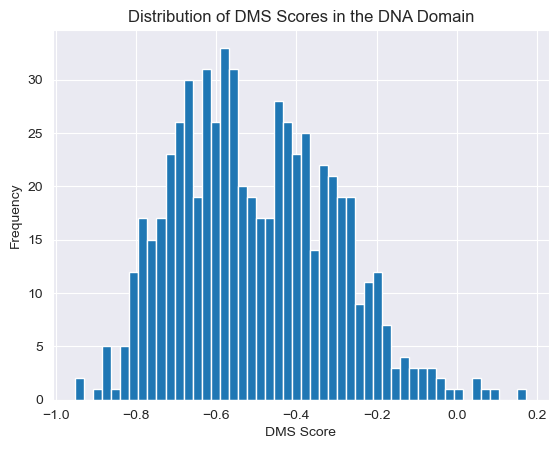

-0.5017798419702857
-0.5243362870711663


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

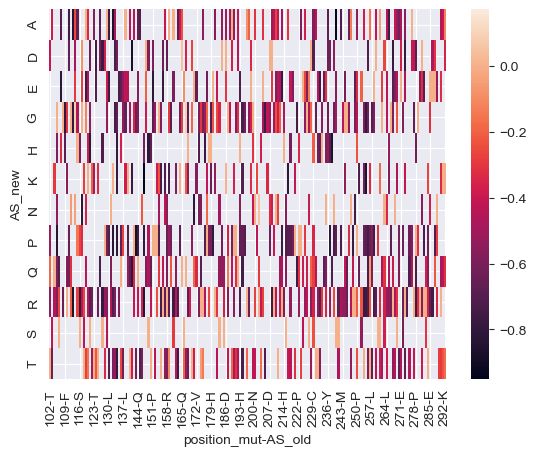

In [27]:

dms_scores_dna = dna_list['DMS_score']

plt.hist(dms_scores_dna, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the DNA Domain')
plt.show()

print(dms_scores_dna.mean())
print(dms_scores_dna.median())

sns.heatmap(dna_domain)

### Tetramerization Domain

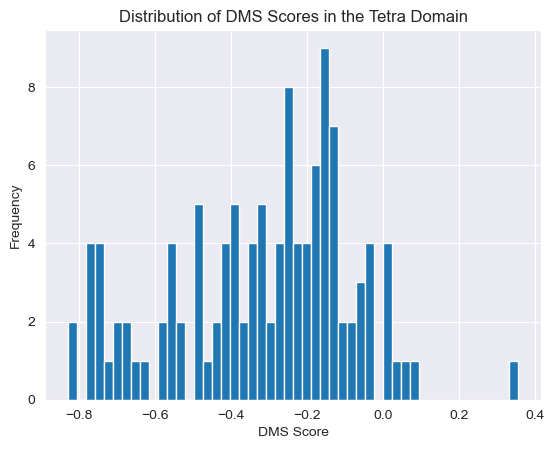

-0.31729064977215343
-0.2630208808645554


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

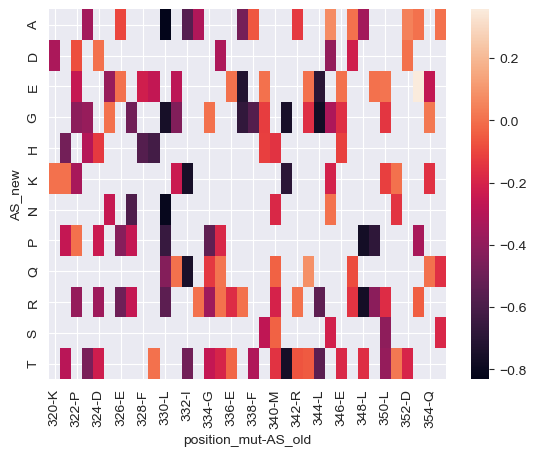

In [28]:

dms_scores_tetra = tetra_list['DMS_score']

plt.hist(dms_scores_tetra, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Tetra Domain')
plt.show()

print(dms_scores_tetra.mean())
print(dms_scores_tetra.median())

sns.heatmap(tetra_domain)

### Regulatory Domain

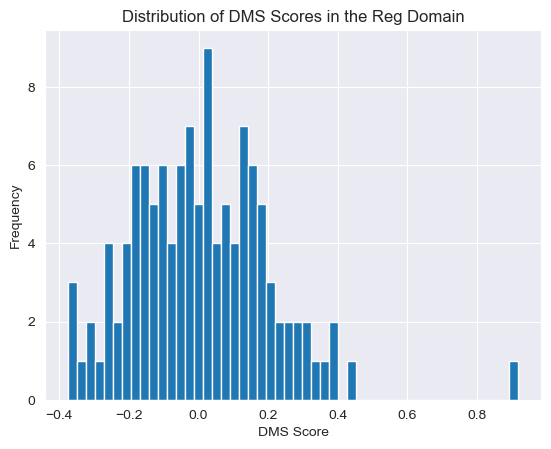

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

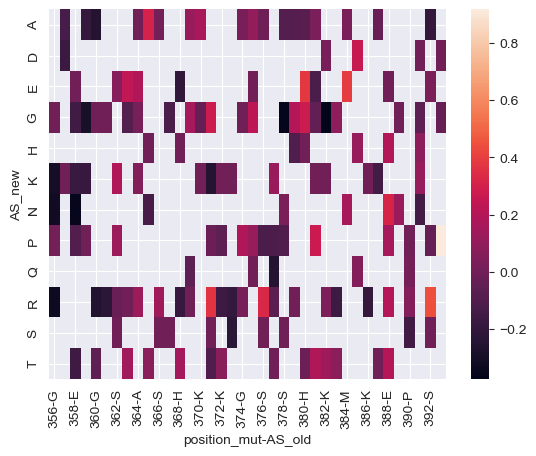

In [29]:

dms_scores_reg = reg_list['DMS_score']

plt.hist(dms_scores_reg, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Reg Domain')
plt.show()

sns.heatmap(reg_domain)

## Comparing all DMS score distributions

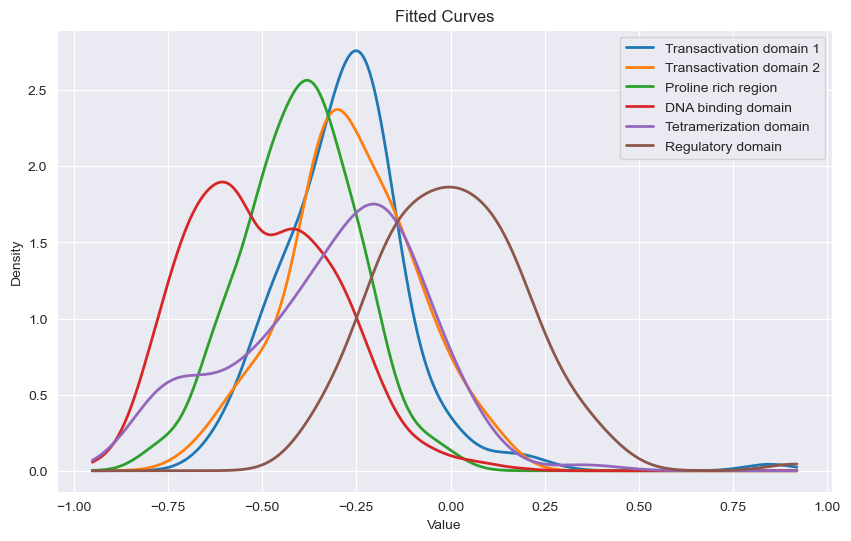

In [30]:
# Combine all datasets
all_dms_scores = np.concatenate((dms_scores_t1, dms_scores_t2, dms_scores_pr,
                                 dms_scores_dna, dms_scores_tetra, dms_scores_reg))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate over each dataset and fit a curve
datasets = ['Transactivation domain 1', 'Transactivation domain 2', 'Proline rich region',
            'DNA binding domain', 'Tetramerization domain', 'Regulatory domain']
for data, label in zip([dms_scores_t1, dms_scores_t2, dms_scores_pr,
                        dms_scores_dna, dms_scores_tetra, dms_scores_reg], datasets):
    # Fit a curve to the data using KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(np.min(all_dms_scores), np.max(all_dms_scores), 1000)
    y_vals = kde(x_vals)

    # Plot the fitted curve with label
    ax.plot(x_vals, y_vals, linewidth=2, label=label)

# Add labels, title, and legend
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Fitted Curves')
ax.legend()

# Show the plot
plt.show()

## Standard deviation


In [31]:

t1_std = t1_mean.std()
t2_std = t2_mean.std()
pr_std = pr_mean.std()
dna_std = dna_mean.std()
tetra_std = tetra_mean.std()
reg_std = reg_mean.std()

std_combined = pd.DataFrame({
    't1_std': [t1_std],
    't2_std': [t2_std],
    'pr_std': [pr_std],
    'dna_std': [dna_std],
    'tetra_std': [tetra_std],
    'reg_std': [reg_std]
})

std_combined

,t1_std,t2_std,pr_std,dna_std,tetra_std,reg_std
0,0.113077,0.067309,0.111125,0.160489,0.194011,0.107732


## Mean value matrix

<Axes: xlabel='AS_new', ylabel='AS_old'>

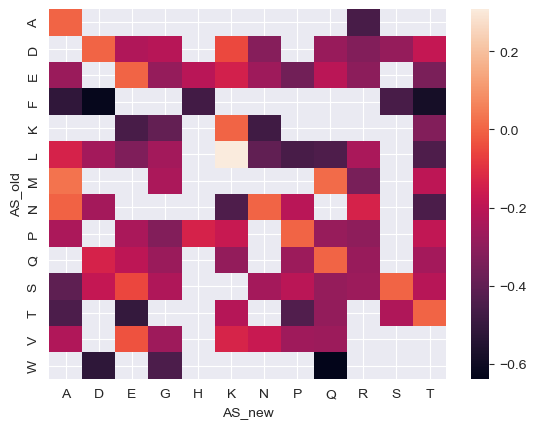

In [32]:
import seaborn as sns
sns.heatmap(dc.rmv_na(de.mean_substitutions(t1_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

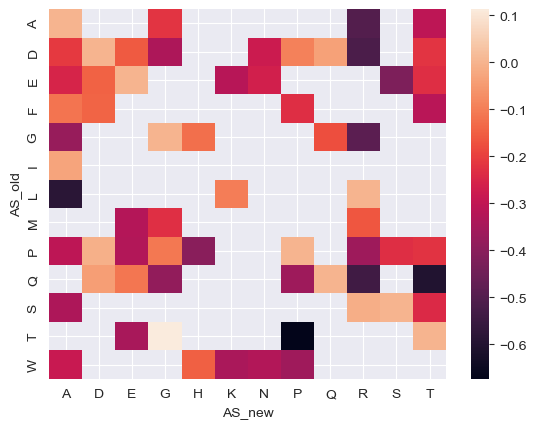

In [33]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(t2_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

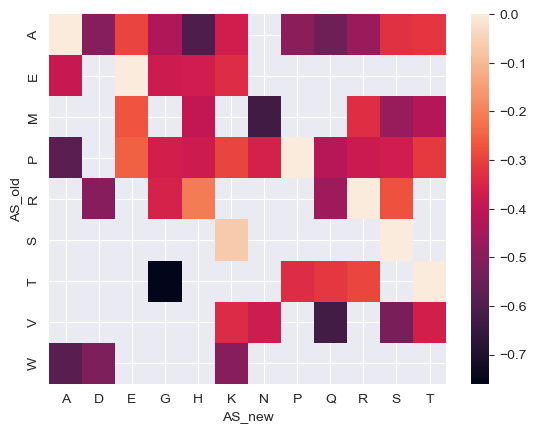

In [34]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(pr_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

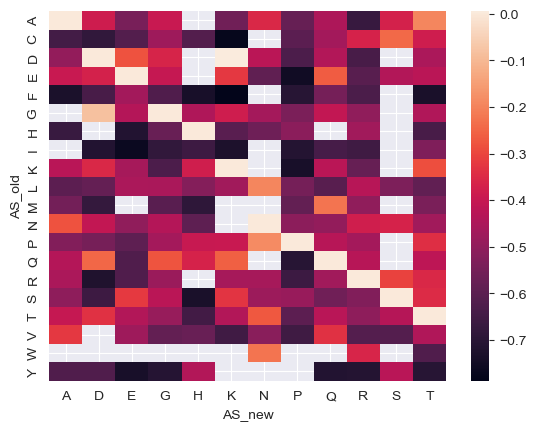

In [35]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(dna_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

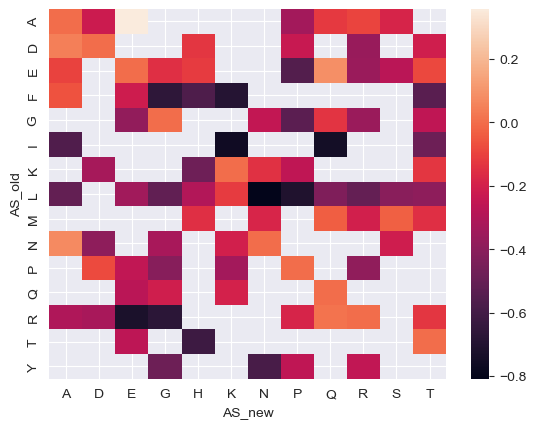

In [36]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(tetra_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

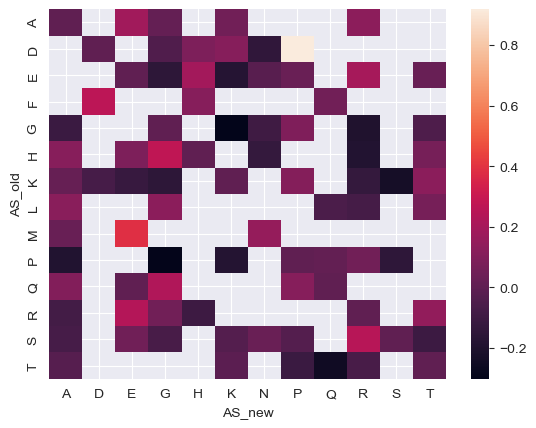

In [37]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(reg_list)))

## Shapiro Wilk test

In [38]:

print('T1 Domain')
print(doc.test_normality(t1_list['DMS_score']))

print('T2 Domain')
print(doc.test_normality(t2_list['DMS_score']))

print('PR Domain')
print(doc.test_normality(pr_list['DMS_score']))

print('DNA Domain')
print(doc.test_normality(dna_list['DMS_score']))

print('Tetra Domain')
print(doc.test_normality(tetra_list['DMS_score']))

print('Reg Domain')
print(doc.test_normality(reg_list['DMS_score']))

T1 Domain
{'statistic': 0.876578152179718, 'p-value': 1.2294285589575793e-09, 'is_normal': False}
T2 Domain
{'statistic': 0.9883272051811218, 'p-value': 0.7639176249504089, 'is_normal': True}
PR Domain
{'statistic': 0.992765486240387, 'p-value': 0.9205955266952515, 'is_normal': True}
DNA Domain
{'statistic': 0.9836325645446777, 'p-value': 1.7247011783183552e-06, 'is_normal': False}
Tetra Domain
{'statistic': 0.9646195769309998, 'p-value': 0.003727989736944437, 'is_normal': False}
Reg Domain
{'statistic': 0.9607881903648376, 'p-value': 0.001548456377349794, 'is_normal': False}
